In [1]:
! pip install tf-explain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.8 MB/s 


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

In [5]:
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

In [4]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [7]:
images_originals=[]

for img_path in sorted(glob.glob('./data/img/*_0.jpg')):
  images_originals.append(mpimg.imread(img_path))

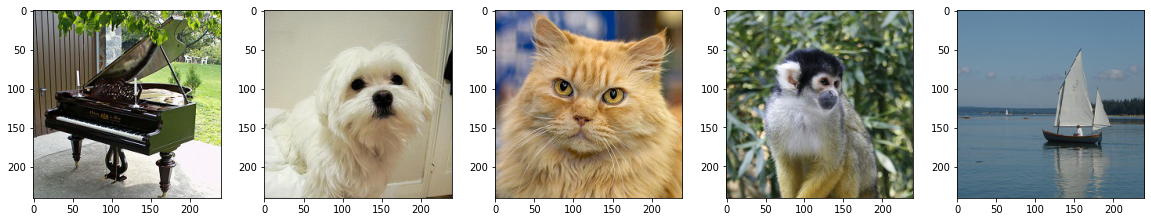

In [8]:
plt.figure(figsize=(20,20))

for i, image_o in enumerate(images_originals):
  plt.subplot(5,5,i+1)
  plt.imshow(image_o)

In [9]:
model = VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 4s 0us/step


In [13]:
input_list = ['maltese', 'persian_cat', 'squirrel_monkey', 'grand_piano', 'yawl']
imagenet_index = ['153', '283', '382', '579', '914']

In [14]:
explainer = GradCAM()

In [19]:
images_cams = []

for l, i in zip(input_list, imagenet_index):
  img = load_img('./data/img/{}_0.jpg'.format(l), target_size = (224, 224))
  img = img_to_array(img)
  data = ([img], None)
  grid = explainer.explain(data, model, int(i))
  explainer.save(grid, '.', './data/img/{}_cam.jpg'.format(l))

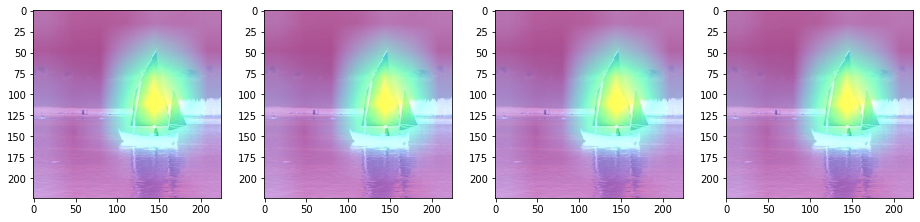

In [28]:
plt.figure(figsize=(20,20))

for img_path in sorted(glob.glob('./data/img/*_cam.jpg')):
  images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
  plt.subplot(5,5,i+1)
  plt.imshow(image_c)

explainer = OcclusionSensitivity()

images_occ1s=[]

patch_size=40

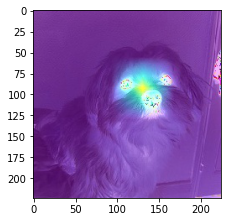

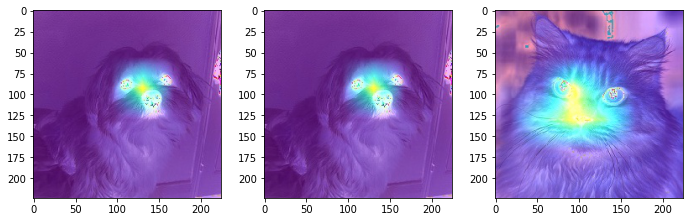

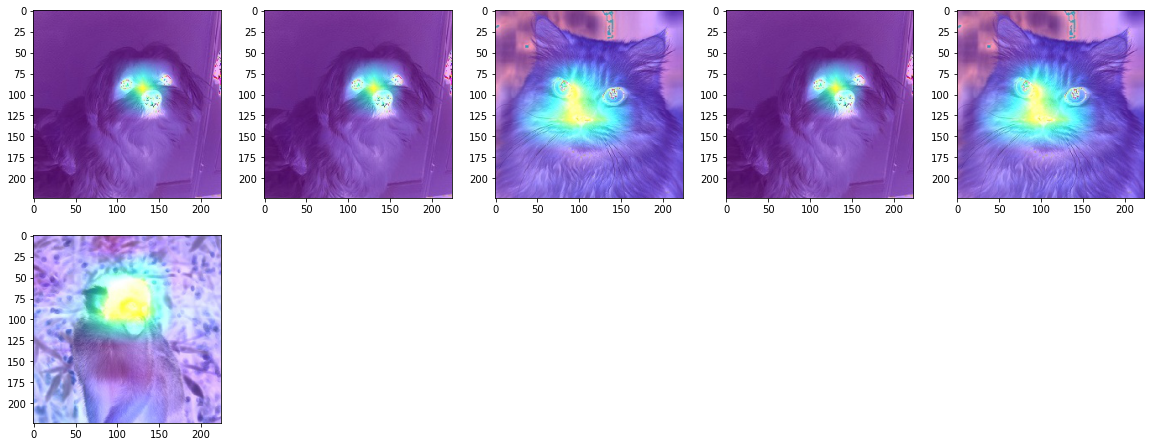

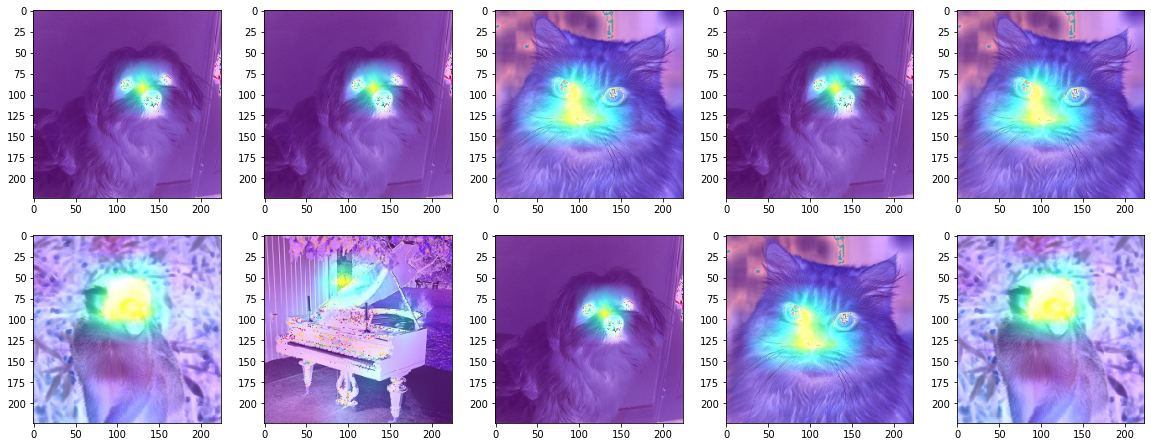

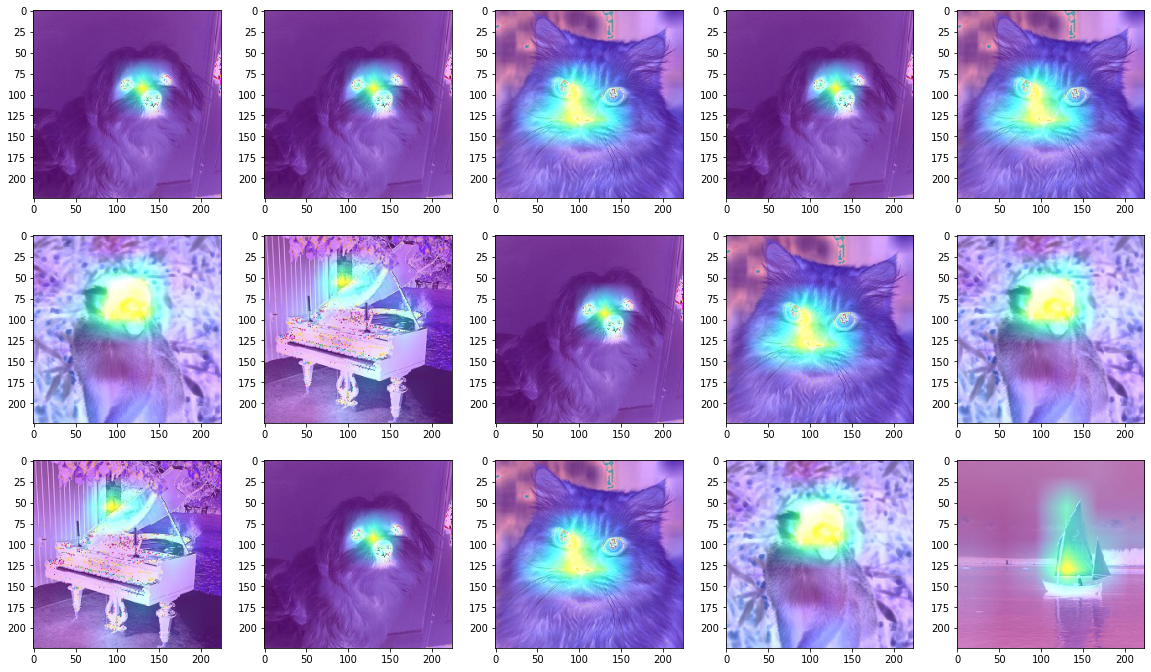

In [26]:
for l, i in zip(input_list, imagenet_index):
  img=load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
  img=img_to_array(img)
  data = ([img], None)
  grid = explainer.explain(data, model, int(i), patch_size)
  explainer.save(grid, '.', './data/img/{}_occ1.jpg'.format(l))

  plt.figure(figsize=(20, 20))

  for img_path in sorted(glob.glob('./data/img/*_occ1.jpg')):
    images_occ1s.append(mpimg.imread(img_path))

  for i, image in enumerate(images_occ1s):
    plt.subplot(5, 5, i+1)
    plt.imshow(image)